In [226]:
import pandas as pd

In [227]:
train = pd.read_csv(r'C:\Users\Rahul\Downloads\Malignant Comments Classifier Project\train.csv')

train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [228]:
test = pd.read_csv(r'C:\Users\Rahul\Downloads\Malignant Comments Classifier Project\test.csv')

test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


since the test dataset has the comments, it shall be used as the x_test while model building to let the model predict whether the comments are malignant are not.

In [229]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [230]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

There are no null values in both the datasets.

In [231]:
print(train.info())

print('\n')

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


'id' and 'comment_text' columns are object datatype in both the datasets. By the end of pre-modelling stage, the column 'id' will mostly be ommited from the data since it do not hold any relevant info for the model building.

In [232]:
col= ['malignant','highly_malignant','loathe','rude','abuse','threat']

[print(train[i].value_counts(), '\n') for i in col]

0    144277
1     15294
Name: malignant, dtype: int64 

0    157976
1      1595
Name: highly_malignant, dtype: int64 

0    158166
1      1405
Name: loathe, dtype: int64 

0    151122
1      8449
Name: rude, dtype: int64 

0    151694
1      7877
Name: abuse, dtype: int64 

0    159093
1       478
Name: threat, dtype: int64 



[None, None, None, None, None, None]

## Data Visualization

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

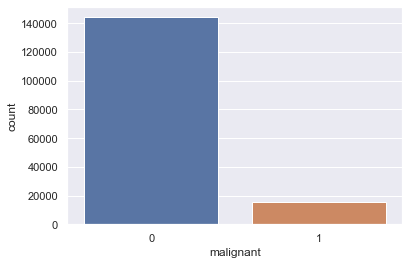

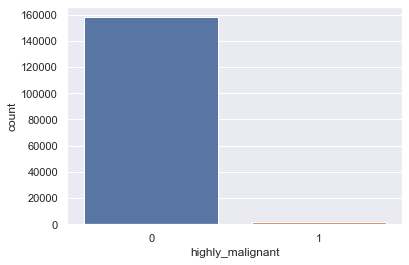

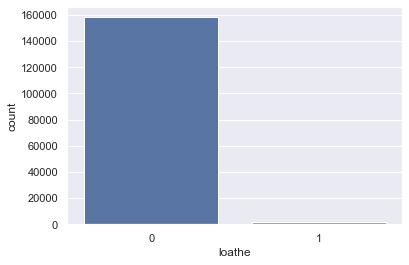

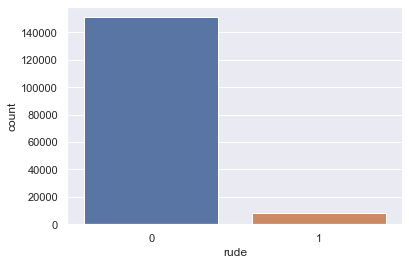

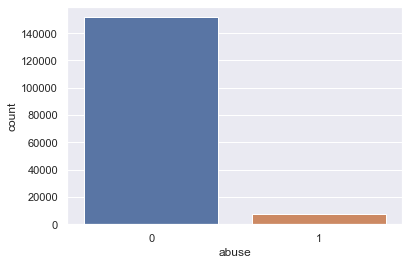

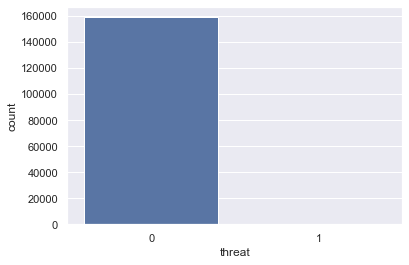

In [234]:
for i in col:
    sns.countplot(train[i])
    plt.show()

The value counts and the respective countplot suggests that the value 0 seems to be more in number in comparison.

In [400]:
comment = train['comment_text']
print(comment.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [401]:
label = train[['malignant','highly_malignant','loathe','rude','abuse','threat']]
print(label.head())

   malignant  highly_malignant  loathe  rude  abuse  threat
0          0                 0       0     0      0       0
1          0                 0       0     0      0       0
2          0                 0       0     0      0       0
3          0                 0       0     0      0       0
4          0                 0       0     0      0       0


#### Let us analyse the no. of comments having lengths varying from 0 to 1200

average length of comment: 394.139




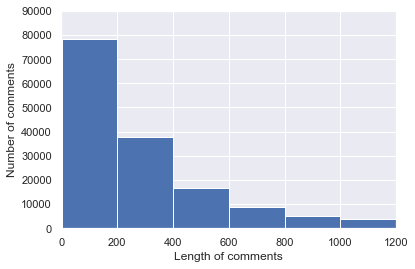

In [237]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x))) #To get the average length.

print('\n')

bins = [1,200,400,600,800,1000,1200] #To see the no.of blocks in x axis.

plt.hist(x, bins=bins)

plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)

plt.show()

In [238]:
import numpy as np

In [239]:
label1 = label.to_numpy()

label1

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

#### Number of comments classified as malignant,highly_malignant,loathe,....etc depending on their lengths

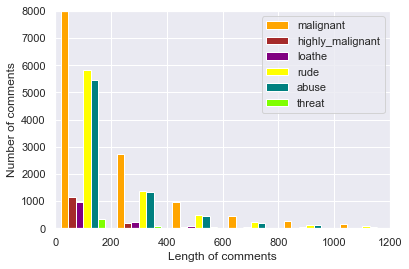

In [240]:
y = np.zeros(label1.shape) #It will zeros in that respective shape.

for ix in range(comment.shape[0]):
    l = len(comment[ix])
    
    #There are 5 columns in label1 which will tell how abusive the each comment is..
    
    if label1[ix][0] :
        y[ix][0] = l
    if label1[ix][1] :
        y[ix][1] = l
    if label1[ix][2] :
        y[ix][2] = l
    if label1[ix][3] :
        y[ix][3] = l
    if label1[ix][4] :
        y[ix][4] = l
    if label1[ix][5] :
        y[ix][5] = l
        

label1splt = ['malignant','highly_malignant','loathe','rude','abuse','threat']
color = ['orange','brown','purple','yellow','teal','chartreuse']        
plt.hist(y,bins = bins,label = label1splt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

The count of 'malignant' is high in every length of respective comment followed 'rude' and 'abuse'.

Malignant and rude, abuse seeems to be in correlation with each other.

AxesSubplot(0.125,0.125;0.62x0.755)


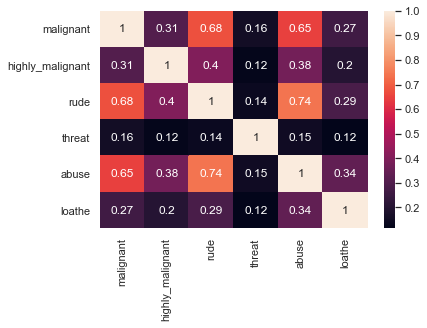

In [241]:
## checking correlation in dataset

print(sns.heatmap(train.corr(), annot = True))

It is clear that 'rude' and 'abuse' are highly correlated with 'malignant'

In [415]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\rahul\anaconda3\python.exe -m pip install --upgrade pip' command.


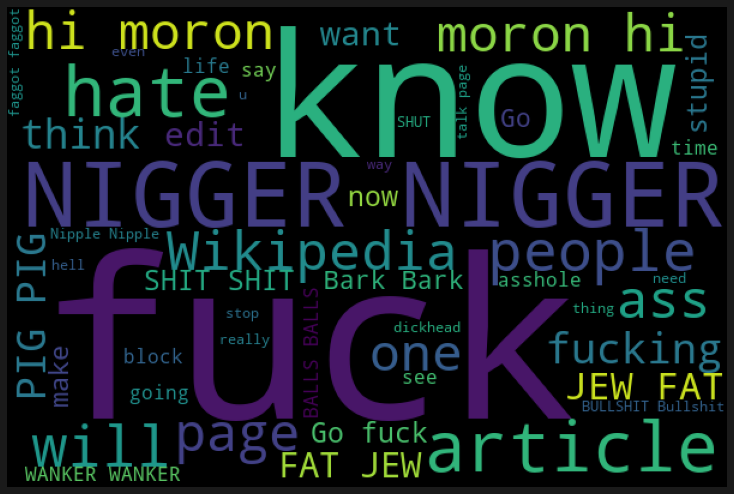

In [416]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Removing excess info. (Data compromise for a better model)

In [402]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        labels.append(label1[ix])

The comments which are reaching till 1200 or more in length of words will take more time in model building. Thus, we shall ommit those comments which are more than 400 words of length.

In [243]:
len(comments)

115893

In [244]:
labels = np.asarray(labels)

In [245]:
labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [246]:
labelss = pd.DataFrame(labels)

In [247]:
labelss.rename(columns = {0: 'Malignant', 1: 'highly_malignant', 2: 'loathe', 3: 'rude', 4: 'abuse', 5: 'threat'}, inplace = True)

In [248]:
labelss

,Malignant,highly_malignant,loathe,rude,abuse,threat
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
115888,0,0,0,0,0,0
115889,0,0,0,0,0,0
115890,0,0,0,0,0,0
115891,0,0,0,0,0,0


### Let's reduce the Test dataset as well, it will help us in reducing the model building time.

In [253]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [254]:
test.shape

(153164, 2)

In [255]:
test.drop(['id'], axis = 1, inplace = True) #'id' columns is of no use.

In [342]:
test

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [341]:
test.shape

(153164, 1)

We shall seperate the comments column from test data to reduce it.

In [343]:
user_comment = test['comment_text']
print(user_comment.head())

0    Yo bitch Ja Rule is more succesful then you'll...
1    == From RfC == \n\n The title is fine as it is...
2    " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3    :If you have a look back at the source, the in...
4            I don't anonymously edit articles at all.
Name: comment_text, dtype: object


In [344]:
test_1 = []

for ix in range(user_comment.shape[0]):
    if len(user_comment[ix])<=400:
        test_1.append(user_comment[ix])

The sentences which are more than 400 words have been ommited from the data.

## Pre-Processing

We'll use NLP methods to remove stopwords, punctuations, extra info from the data to make the machine model building easier.

These are the following steps:

    1) Removing Punctuations and other special characters
    2) Splitting the comments into individual words
    3) Removing Stop Words
    4) Lemmatising
    5) Applying TfIdf Vectoriser
    6) Splitting dataset into Training and Testing

In [263]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

##### Removing Punctuations and other special characters

In [320]:
import string

print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789" #Numbers, slashes and spaces(punctuations) will be gone.
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


##### Removing Stop Words

In [322]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1): #All the stopwords from the data will be ommited.
    stop_words.append(chr(x))

##### Lemmatising

In [323]:
#create objects for lemmatizer
lemmatiser = WordNetLemmatizer()

#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Train Data modification

In [328]:
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab) #It removes punctuations and converts text into lowercase.
    l = []
    for word in comments[i].split(): #This will split the data into words.
        l.append(lemmatiser.lemmatize(word,pos="v")) #lemmatizing the data
    comments[i] = " ".join(l) #joining the words back into sentences.

In [348]:
comments = np.asarray(comments) #Converting the data into array.

In [349]:
comment = pd.DataFrame(comments) #the array is being dataframed.

In [350]:
comment.rename(columns = {0:'comment_text'}, inplace = True)

In [351]:
comment

,comment_text
0,explanation why the edit make under my usernam...
1,d'aww he match this background colour i'm seem...
2,hey man i'm really not try to edit war it's ju...
3,you sir be my hero any chance you remember wha...
4,congratulations from me as well use the tool w...
...,...
115888,and for the second time of ask when your view ...
115889,you should be ashamed of yourself that be a ho...
115890,spitzer umm theres no actual article for prost...
115891,and it look like it be actually you who put on...


### Test Data modification

In [346]:
for i in range(len(test_1)):
    test_1[i] = test_1[i].lower().translate(trantab)
    l = []
    for word in test_1[i].split():
        l.append(lemmatiser.lemmatize(word,pos="v"))
    test_1[i] = " ".join(l)

In [352]:
test1 = np.asarray(test_1) #Converting the data into array.

In [353]:
test1 = pd.DataFrame(test1) #the array is being dataframed.

In [354]:
test1.rename(columns = {0:'comment_text'}, inplace = True)

test1

,comment_text
0,yo bitch ja rule be more succesful then you'll...
1,from rfc the title be fine as it be imo
2,source zawe ashton on lapland —
3,if you have a look back at the source the info...
4,i don't anonymously edit article at all
...,...
115764,disagree soviet railways need their own articl...
115765,this idiot can't even use proper grammar when ...
115766,i totally agree this stuff be nothing but too ...
115767,throw from out field to home plate do it get t...


#### Before we split the data, we'll see how the labels are distriburted with respect to comments

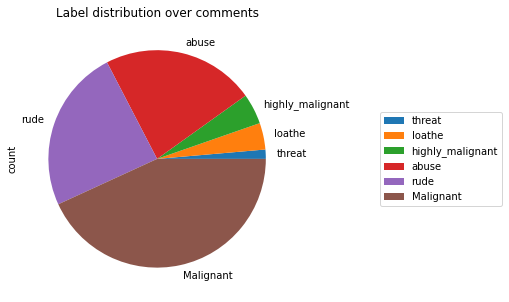

In [122]:
cols_target = ['Malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = labelss[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

Malignant, rude and abuse labels are seen to be more.

Let's sum up all the negative labels into a single label which will be named 'unparliamentary' for easy model prediction.

'unparliamentary' represents the summated value of rest of the columns. I.e. The values in this column are proportional to the summation of rest of the columns.

In [355]:
target_data = labelss[cols_target]

labelss['unparliamentary'] =labelss[cols_target].sum(axis =1)
print(labelss['unparliamentary'].value_counts())
labelss['unparliamentary'] = labelss['unparliamentary'] > 0 
labelss['unparliamentary'] = labelss['unparliamentary'].astype(int)
print(labelss['unparliamentary'].value_counts())

0    102398
1      4945
3      3694
2      3000
4      1505
5       328
6        23
Name: unparliamentary, dtype: int64
0    102398
1     13495
Name: unparliamentary, dtype: int64


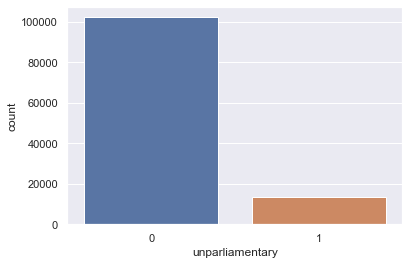

In [267]:
sns.set()
sns.countplot(x="unparliamentary" , data = labelss)
plt.show()

The distribution of the data is imbalanced. The minority value will be compromised while machine model learning as the dominant value will be learned more and the model prediction might get affected.

In [404]:
y = labelss['unparliamentary']

'y' is the target variable for the machine model to learn and predict for the test dataset.

In [405]:
y

0         0
1         0
2         0
3         0
4         0
         ..
115888    0
115889    0
115890    0
115891    0
115892    0
Name: unparliamentary, Length: 115893, dtype: int32

The data distribution is imbalanced, we need to apply SMOTE method to create samples for minority class (1 in our case).

### Synthetic Minority Oversampling Technique - SMOTE

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [406]:
df_class_0 = labelss[labelss['unparliamentary'] == 0]

In [407]:
df_class_1 = labelss[labelss['unparliamentary'] == 1]

In [408]:
y.shape

(115893,)

In [409]:
df_class_1_over = df_class_1.sample(115893, replace=True)

In [410]:
Y = pd.concat([df_class_0, df_class_1_over], axis=0)

print(Y.unparliamentary.value_counts())

1    115893
0    102398
Name: unparliamentary, dtype: int64


The distribution seems balanced now. We can perform the model building without the worry of skipping the minor values.

#### Y_train and Y_test

In [411]:
Y_train = y[:75000]

Y_test = y[:40893]

In [412]:
print(Y_train.shape)
print(Y_test.shape)

(75000,)
(40893,)


#### X_train

In [365]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')

features = tf_vec.fit_transform(comment['comment_text'])

x_train = features

In [366]:
X_train = x_train[:75000]

In [367]:
X_train.shape

(75000, 10000)

#### X_test

In [368]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')

featuress = tf_vec.fit_transform(test1['comment_text'])

x_test = featuress

In [369]:
X_test = x_test[:40893]

In [370]:
X_test.shape

(40893, 10000)

## Model Selection

### Multinomial Naive Bayes

In [287]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import xgboost as xgb
seed = 4353

In [288]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predictions = MNB.predict(X_test)

In [289]:
# Model evaluation

print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

MNB_f1 = round(f1_score(Y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(Y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     36083
           1       0.12      0.07      0.09      4810

    accuracy                           0.83     40893
   macro avg       0.50      0.50      0.50     40893
weighted avg       0.79      0.83      0.81     40893

[[33560  2523]
 [ 4464   346]]
Accuracy :  82.91  %
f1_score :  0.81


### XGBoost

In [413]:
# xgboost
import warnings
warnings.filterwarnings("ignore")

import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred_train = xgb.predict(X_train)

y_pred_test = xgb.predict(X_test)

print(confusion_matrix(Y_test,y_pred_test))
print(classification_report(Y_test,y_pred_test))

print('\n')

print('Training accuracy is {}'.format(accuracy_score(Y_train, y_pred_train)))

print('\n')

print('Test accuracy is {}'.format(accuracy_score(Y_test,y_pred_test)))

[16:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[35417   666]
 [ 4714    96]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     36083
           1       0.13      0.02      0.03      4810

    accuracy                           0.87     40893
   macro avg       0.50      0.50      0.48     40893
weighted avg       0.79      0.87      0.82     40893



Training accuracy is 0.9577733333333334


Test accuracy is 0.868437140830949


### Random Forest Classifier

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators":[10,100,500]}

rfc=RandomForestClassifier()

clf = GridSearchCV(rfc, parameters, cv=10)
clf.fit(X_train,Y_train)
clf.best_params_

{'n_estimators': 500}

In [293]:
rfc = RandomForestClassifier(n_estimators=500)

rfc.fit(X_train,Y_train)
rfc_predict=rfc.predict(X_test)

In [294]:
print(classification_report(Y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     36083
           1       0.12      0.08      0.09      4810

    accuracy                           0.83     40893
   macro avg       0.50      0.50      0.50     40893
weighted avg       0.79      0.83      0.81     40893



In [295]:
print("Model Acc:",rfc.score(X_test,Y_test))

Model Acc: 0.8264006064607634


### KNN

In [165]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

kc=KNeighborsClassifier()

neighbors={"n_neighbors":range(1,10)}
clf = GridSearchCV(kc, neighbors, cv=5)
clf.fit(X_train,Y_train)
clf.best_params_

{'n_neighbors': 1}

In [166]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
knn_predict=knn.predict(X_test)

In [168]:
print("Model Acc:",knn.score(X_test,Y_test))

Model Acc: 0.8723843206601827


### SVC

In [169]:
from sklearn.svm import SVC

svc=SVC()

parameters={"kernel":["linear", "poly", "rbf"],"C":[0.01,0.1,1]}
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train,Y_train)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [170]:
svc=SVC(C=1,kernel="linear")

svc.fit(X_train,Y_train)
svc_predict=svc.predict(X_test)

In [173]:
print("Model Acc:",svc.score(X_test,Y_test))

Model Acc: 0.8659003831417624


### Final best model - XGBoost

The model has nearly 87% of predicting the right values for the provided test data.

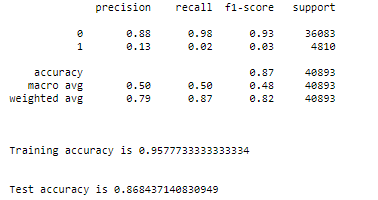

In [373]:
y_pred_test.shape

(40893,)

In [380]:
abuse_prediction = y_pred_test

#lets make the dataframe for price_prediction

abuse_prediction = pd.DataFrame(abuse_prediction, test1['comment_text'][:40893], columns=["Abuse level"])

In [376]:
abuse_prediction.to_csv("test.csv",index=True)